In [1]:
from slater_dl_wrapper.models import MultiLayerPerceptron
from slater_dl_wrapper.helpers import *
import torch

In [2]:
RANDOM_SEED = 1
BATCH_SIZE = 5
NUM_EPOCHS = 200
# DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
DEVICE = torch.device("cpu")
print(DEVICE)

cpu


In [3]:
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms

train_size = 20

train_dataset = Subset(datasets.MNIST(root='data', train=True, transform=transforms.ToTensor(), download=True), range(train_size))
valid_dataset = Subset(datasets.MNIST(root='data', train=True, transform=transforms.ToTensor(), download=True), range(train_size, 1000 + train_size))

train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(dataset=valid_dataset, batch_size=BATCH_SIZE, shuffle=False)

print(f'Train: {len(train_dataset)}')
print(f'Valid: {len(valid_dataset)}')

Train: 20
Valid: 1000


In [4]:
torch.manual_seed(RANDOM_SEED)
model = MultiLayerPerceptron(num_features=28**2,
                             num_classes=10,
                             hidden_sizes=[50, 20],
                            #  activations='ReLU',
                             dropout_probs=[0.1],
                             flatten=True)

print(model)

['ReLU', 'ReLU']
MultiLayerPerceptron(
  (model): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=50, bias=True)
    (2): Dropout(p=0.1, inplace=False)
    (3): ReLU()
    (4): Linear(in_features=50, out_features=20, bias=True)
    (5): Dropout(p=0.1, inplace=False)
    (6): ReLU()
    (7): Linear(in_features=20, out_features=10, bias=True)
  )
)


Time	Epoch	Loss	Train	Valid
00:00	1	2.2342	20.00	11.60
00:00	2	2.1955	20.00	11.60
00:00	3	2.2559	20.00	11.60
00:00	4	2.0989	30.00	13.50
00:00	5	2.1617	35.00	19.20
00:00	6	2.1328	35.00	19.20
00:00	7	2.0172	35.00	17.30
00:00	8	1.8265	35.00	20.00
00:00	9	1.7625	35.00	20.00
00:00	10	1.7307	45.00	21.10
00:00	11	1.5482	50.00	22.40
00:00	12	1.7172	70.00	27.60
00:00	13	1.3432	65.00	26.30
00:00	14	1.1961	80.00	37.50
00:00	15	1.6935	70.00	32.30
00:00	16	1.0200	90.00	38.00
00:00	17	1.3302	90.00	38.60
00:00	18	1.3220	90.00	39.30
00:00	19	0.8162	85.00	40.20
00:00	20	0.5888	90.00	44.30
00:00	21	0.5177	90.00	48.20
00:00	22	0.4691	100.00	46.00
00:00	23	0.4184	95.00	42.10
00:00	24	1.1104	95.00	49.90
00:00	25	0.4881	100.00	50.30
00:00	26	0.5242	100.00	52.10
00:00	27	0.6190	100.00	48.30
00:00	28	0.2249	100.00	55.10
00:00	29	0.1942	100.00	46.20
00:00	30	0.2619	100.00	53.80
00:00	31	0.0974	100.00	56.30
00:00	32	0.1045	100.00	55.60
00:00	33	0.1605	100.00	55.00
00:00	34	0.3015	100.00	51.10
00:00	35	0.0645	10

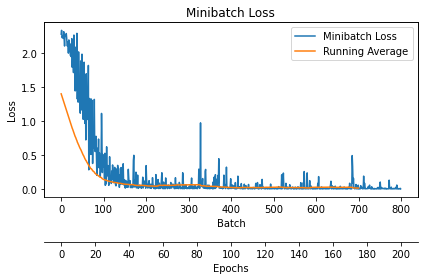

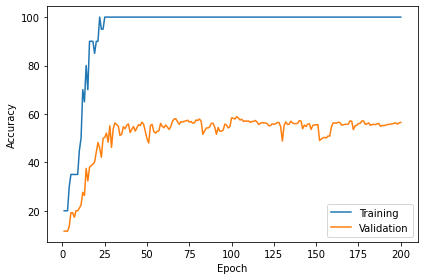

In [5]:
minibatch_loss_list, train_acc_list, valid_acc_list = train(model,
                                                            NUM_EPOCHS,
                                                            train_loader,
                                                            valid_loader=valid_loader,
                                                            learning_rate=0.1,
                                                            device=DEVICE)

plot_training_loss(minibatch_loss_list, NUM_EPOCHS, len(train_dataset) // BATCH_SIZE, results_dir=None, averaging_iterations=100)
plot_accuracy(train_acc_list=train_acc_list, valid_acc_list=valid_acc_list, results_dir=None)